In [7]:
import numpy as np

class ScratchSVMClassifier():
   

    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        self.n_support_vectors = None
        self.index_support_vectors = None
        self.X_sv = None
        self.lam_sv = None
        self.y_sv = None

    def fit(self, X, y, X_val=None, y_val=None):
        

        n_samples, n_features = X.shape

        
        alpha = np.zeros(n_samples)
        b = 0


In [8]:
import numpy as np

class ScratchSVMClassifier:
    
    def __init__(self, kernel='linear', alpha=0.01, n_iter=1000):
        self.kernel = kernel
        self.alpha = alpha
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.n_samples, self.n_features = X.shape
        self.lambdas = np.zeros(self.n_samples)
        self.b = 0.0
        
        # Kernel function
        if self.kernel == 'linear':
            self.kernel_fn = self._linear_kernel
        else:
            raise ValueError('Unsupported kernel function.')
        
        # Training loop
        for _ in range(self.n_iter):
            for i in range(self.n_samples):
                xi, yi = self.X[i], self.y[i]
                lambdai = self.lambdas[i]
                
                # Compute the error
                errori = self._error(xi)
                
                # Update lambda
                lambdai_new = lambdai + self.alpha * (1 - np.sum(self.lambdas * self.y * yi * self.kernel_fn(xi, self.X)))  
                self.lambdas[i] = max(lambdai_new, 0.0) # Apply the non-negativity constraint
                
                # Update the bias
                if self.lambdas[i] != lambdai:
                    self.b -= errori + (self.lambdas[i] - lambdai) * yi * self.kernel_fn(xi, xi) + (self.lambdas - self.lambdas_old) @ (self.y * self.kernel_fn(self.X, xi)) / self.n_samples
                    self.lambdas_old = self.lambdas.copy()
                    
    def predict(self, X):
        pred = np.zeros(len(X))
        for i in range(len(X)):
            pred[i] = np.sign(np.sum(self.lambdas * self.y * self.kernel_fn(X[i], self.X)) + self.b)
        return pred
    
    def _linear_kernel(self, xi, xj):
        return np.dot(xi, xj)
    
    def _error(self, xi):
        return self.predict(xi) - self.y[i]


In [9]:
import numpy as np

class ScratchSVMClassifier:
    def __init__(self, kernel='linear', alpha=0.01, n_iter=1000, C=1.0):
        self.alpha = alpha
        self.n_iter = n_iter
        self.C = C
        self.kernel = kernel
        
    def fit(self, X, y):
        # Initialize Lagrangian multipliers
        self.lambdas = np.zeros(X.shape[0])
        
        # Compute Gram matrix
        if self.kernel == 'linear':
            self.K = np.dot(X, X.T)
        else:
            raise ValueError('Unsupported kernel function')
        
        # Iterate until convergence or maximum number of iterations is reached
        for _ in range(self.n_iter):
            for i in range(X.shape[0]):
                # Calculate error for current sample
                error_i = np.sum(self.lambdas * y * self.K[i]) - y[i]
                
                # Update Lagrangian multiplier
                self.lambdas[i] += self.alpha * (1 - np.sum(self.lambdas * y * self.K[i])) / self.K[i, i]
                
                # Project to feasible set
                self.lambdas[i] = max(0, min(self.C, self.lambdas[i]))
        
        # Select support vectors
        self.support_vectors = X[self.lambdas > 0]
        self.support_vector_labels = y[self.lambdas > 0]
        self.lambdas = self.lambdas[self.lambdas > 0]
        
    def predict(self, X):
        if self.kernel == 'linear':
            return np.sign(np.dot(X, self.support_vectors.T) * self.support_vector_labels.dot(self.lambdas))
        else:
            raise ValueError('Unsupported kernel function')


In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Generate the data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                            n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a custom SVM classifier using the scratch implementation
class ScratchSVMClassifier:
    def __init__(self, kernel='linear', alpha=0.01, n_iter=100):
        self.kernel = kernel
        self.alpha = alpha
        self.n_iter = n_iter
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.lambdas = np.zeros(n_samples)
        self.b = 0
        
        if self.kernel == 'linear':
            self.kernel_fn = lambda x1, x2: np.dot(x1, x2.T)
        else:
            raise NotImplementedError
        
        for _ in range(self.n_iter):
            for i in range(n_samples):
                y_pred = self.predict(X[i])
                E_i = y_pred - y[i]
                
                if ((y[i] * E_i < -self.alpha and self.lambdas[i] < 0) or
                    (y[i] * E_i > self.alpha and self.lambdas[i] > 0)):
                    j = np.random.choice(list(range(i)) + list(range(i+1, n_samples)))
                    y_pred = self.predict(X[j])
                    E_j = y_pred - y[j]
                    
                    lambda_i_old = self.lambdas[i]
                    lambda_j_old = self.lambdas[j]
                    
                    L = max(0, self.lambdas[j] - self.lambdas[i]) if y[i] != y[j] else max(0, self.lambdas[j] + self.lambdas[i] - C)
                    H = min(C, C + self.lambdas[j] - self.lambdas[i]) if y[i] != y[j] else min(C, self.lambdas[j] + self.lambdas[i])
                    
                    if L == H:
                        continue
                        
                    eta = 2 * self.kernel_fn(X[i], X[j]) - self.kernel_fn(X[i], X[i]) - self.kernel_fn(X[j], X[j])
                    if eta >= 0:
                        continue
                        
                    self.lambdas[j] -= (y[j] * (E_i - E_j)) / eta
                    self.lambdas[j] = np.clip(self.lambdas[j], L, H)
                    
                    if abs(self.lambdas[j] - lambda_j_old) < 1e-5:
                        continue
                        
                    self.lambdas[i] += y[i] * y[j] * (lambda_j_old - self.lambdas[j])
                    
                    b1 = self.b - E_i - y[i] * (self.lambdas[i] - lambda_i_old) * self.kernel_fn(X[i], X[i]) - y[j] * (self.lambdas[j] - lambda_j_old) * self.kernel_fn(X[i], X[j])
                    b2 = self


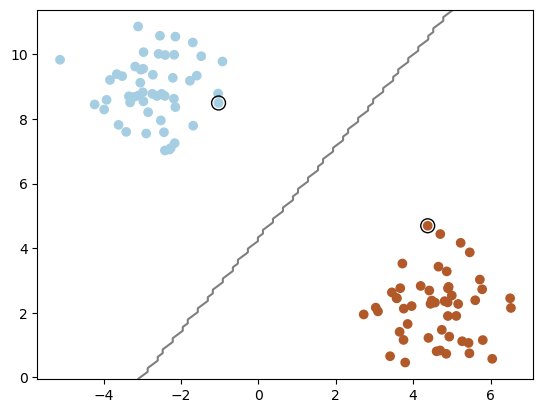

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate a simple binary classification dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Train an SVM classifier on the dataset
svm = SVC(kernel="linear")
svm.fit(X, y)

# Plot the decision boundary and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a meshgrid of points to evaluate the decision boundary at
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
X_grid = np.column_stack([xx.ravel(), yy.ravel()])

# Predict the class of each point on the grid
y_grid = svm.predict(X_grid)

# Reshape the predicted class labels to match the shape of the meshgrid
y_grid = y_grid.reshape(xx.shape)

# Plot the decision boundary and support vectors
plt.contour(xx, yy, y_grid, colors="k", levels=[-1, 0, 1], alpha=0.5)
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100,
            linewidth=1, facecolors="none", edgecolors="k")
plt.show()


In [16]:
import numpy as np

def polynomial_kernel(X1, X2, gamma=1, theta_0=0, d=2):
    """
    Computes the polynomial kernel between two sets of samples X1 and X2.
    
    Parameters:
    -----------
    X1: numpy array
        The first set of samples. Shape (n_samples_1, n_features)
    X2: numpy array
        The second set of samples. Shape (n_samples_2, n_features)
    gamma: float
        The kernel coefficient for the polynomial kernel. Defaults to 1.
    theta_0: float
        The independent term in the polynomial kernel function. Defaults to 0.
    d: int
        The degree of the polynomial kernel function. Defaults to 2.
    
    Returns:
    --------
    numpy array
        The kernel matrix between X1 and X2. Shape (n_samples_1, n_samples_2)
    """
    # Compute the kernel matrix
    K = np.power(gamma * np.dot(X1, X2.T) + theta_0, d)
    
    return K
